In [24]:
import pandas as pd
import datetime
from datetime import date
import holidays # A useful library for handling holidays
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # Changed from MinMaxScaler
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar

In [25]:
# --- Configuration ---
# Define the path to your dataset CSV file
DATA_FILE_PATH = 'Data/data_2018_2024.csv'


In [26]:
# --- Data Loading and Initial Processing ---
print(f"Loading data from {DATA_FILE_PATH}...")
try:
    # Load the dataset, parsing the 'timestamp' column as datetime objects
    df = pd.read_csv(DATA_FILE_PATH, parse_dates=['timestamp'])
    print("Data loaded successfully.")
    print(f"Initial DataFrame shape: {df.shape}")
    print("Initial DataFrame head:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{DATA_FILE_PATH}' was not found.")
    print("Please ensure the CSV file is in the correct 'Data/' directory relative to your script.")
    exit() # Exit if the file is not found, as further processing depends on it

Loading data from Data/data_2018_2024.csv...
Data loaded successfully.
Initial DataFrame shape: (61368, 7)
Initial DataFrame head:
            timestamp      tmpc       relh       sped       feel  p01m  \
0 2018-01-01 01:00:00 -0.833333  91.393333  12.777778  20.792222   0.0   
1 2018-01-01 02:00:00 -1.284444  90.400000  12.266667  20.203333   0.0   
2 2018-01-01 03:00:00 -1.752222  91.590000  11.883333  19.276667   0.0   
3 2018-01-01 04:00:00 -1.895556  90.946667  12.905556  18.685556   0.0   
4 2018-01-01 05:00:00 -1.968889  89.366667  12.394444  18.707778   0.0   

          ERCOT  
0  50567.069682  
1  50617.087977  
2  50694.300087  
3  50999.591693  
4  51723.732017  


In [27]:
# # Set 'timestamp' as the DataFrame index for easier time-series operations
# df.set_index('timestamp', inplace=True)

In [28]:
# Assume df is already loaded
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

# Max-T and Min-T (daily max/min of tmpc)
df['Max-T'] = df['tmpc'].resample('D').transform('max')
df['Min-T'] = df['tmpc'].resample('D').transform('min')

# M-label (Month), W-label (Weekday), H-label (Holiday)
df['M-label'] = df.index.month
df['W-label'] = df.index.weekday + 1  # Monday=1, Sunday=7

# Define US federal holidays
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df.index.min(), end=df.index.max())
df['H-label'] = df.index.normalize().isin(holidays).astype(int)

# Reordering columns (if needed)
df = df[['ERCOT', 'tmpc', 'relh', 'sped', 'feel', 'p01m',
         'Max-T', 'Min-T', 'M-label', 'W-label', 'H-label']]

# Optional: reset index if you want timestamp back as a column
df.reset_index(inplace=True)

In [29]:
df

,timestamp,ERCOT,tmpc,relh,sped,feel,p01m,Max-T,Min-T,M-label,W-label,H-label
0,2018-01-01 01:00:00,50567.069682,-0.833333,91.393333,12.777778,20.792222,0.0,1.901111,-2.630000,1,1,0
1,2018-01-01 02:00:00,50617.087977,-1.284444,90.400000,12.266667,20.203333,0.0,1.901111,-2.630000,1,1,0
2,2018-01-01 03:00:00,50694.300087,-1.752222,91.590000,11.883333,19.276667,0.0,1.901111,-2.630000,1,1,0
3,2018-01-01 04:00:00,50999.591693,-1.895556,90.946667,12.905556,18.685556,0.0,1.901111,-2.630000,1,1,0
4,2018-01-01 05:00:00,51723.732017,-1.968889,89.366667,12.394444,18.707778,0.0,1.901111,-2.630000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61363,2024-12-31 20:00:00,47619.264355,10.124444,54.446667,3.577778,49.871111,0.0,19.740000,8.068889,12,2,0
61364,2024-12-31 21:00:00,46737.678611,9.574444,63.366667,5.494444,47.508889,0.0,19.740000,8.068889,12,2,0
61365,2024-12-31 22:00:00,45775.649767,8.994444,64.966667,6.388889,46.236667,0.0,19.740000,8.068889,12,2,0
61366,2024-12-31 23:00:00,44779.606498,8.068889,65.713333,4.727778,45.061111,0.0,19.740000,8.068889,12,2,0


,feature,pearson_r,spearman_rho,kendall_tau,abs_pearson
0,feel,0.584560,0.618155,0.447900,0.584560
1,tmpc,0.554567,0.617880,0.447217,0.554567
2,Max-T,0.437630,0.520105,0.351906,0.437630
3,Min-T,0.430424,0.501574,0.333423,0.430424
4,relh,-0.296505,-0.279811,-0.188453,0.296505
5,sped,0.163689,0.176637,0.117692,0.163689
6,p01m,-0.007759,-0.053875,-0.043217,0.007759


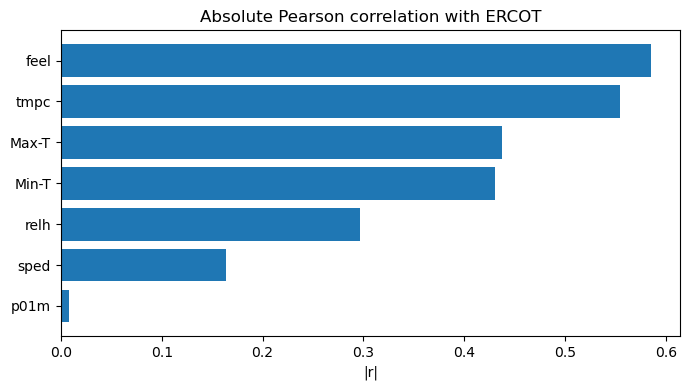

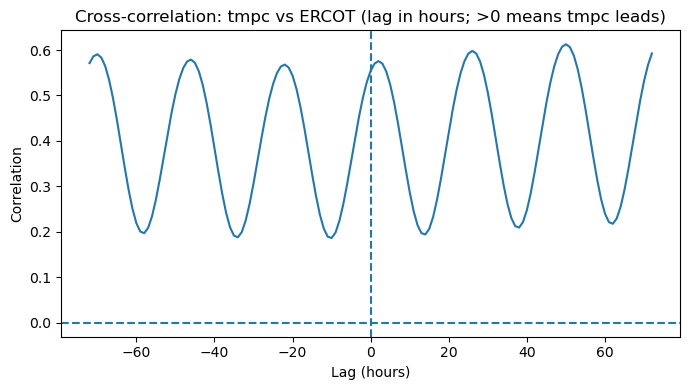

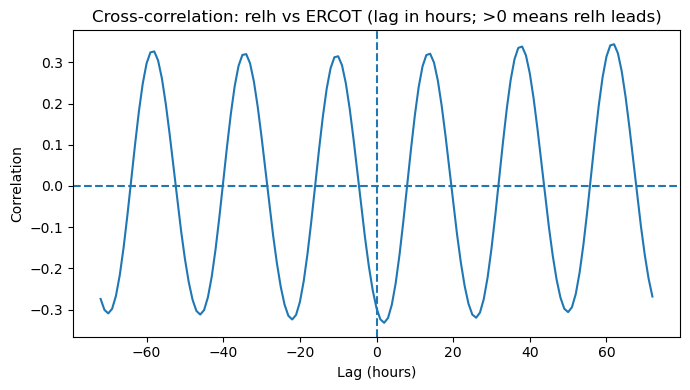

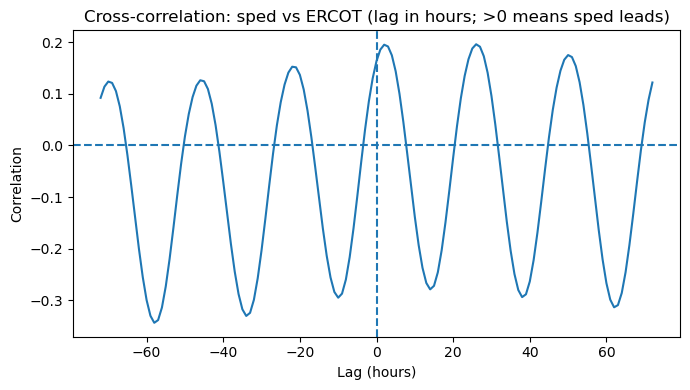

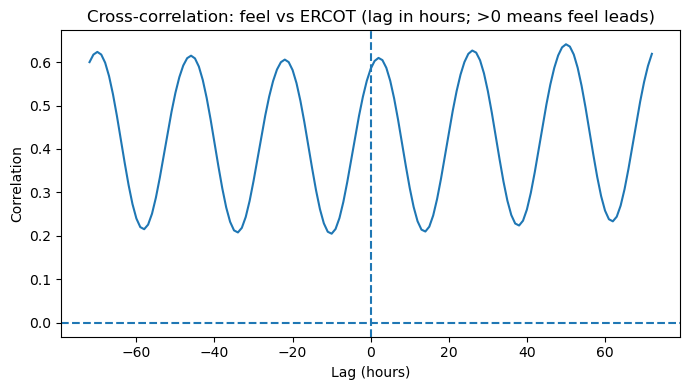

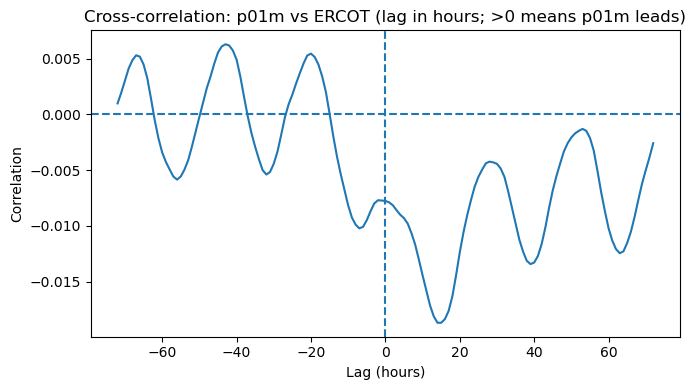

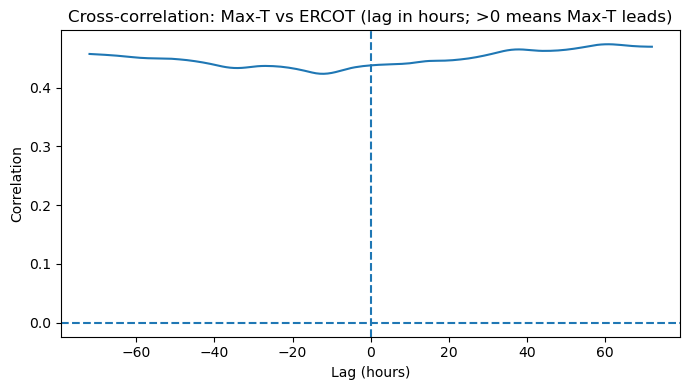

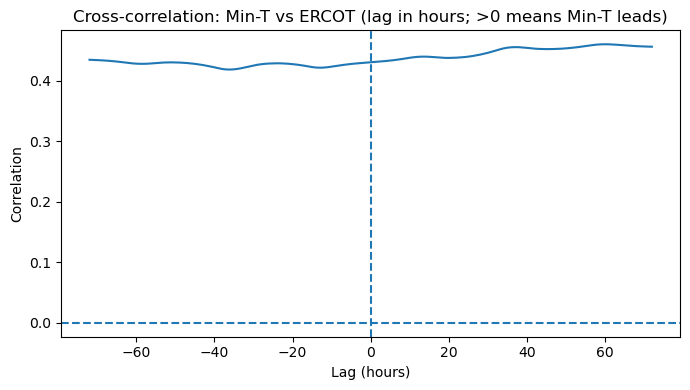

,feature,best_lag_hours,corr_at_best_lag
0,feel,50,0.641016
1,tmpc,50,0.612686
2,Max-T,61,0.473534
3,Min-T,60,0.460302
4,relh,62,0.343812
5,sped,-58,-0.343614
6,p01m,15,-0.018673


,lag_hours,acf
0,0,1.000000
1,1,0.985311
2,2,0.944133
3,3,0.881822
4,4,0.804026
5,5,0.716800
6,6,0.626645
7,7,0.539930
8,8,0.462098
9,9,0.397378


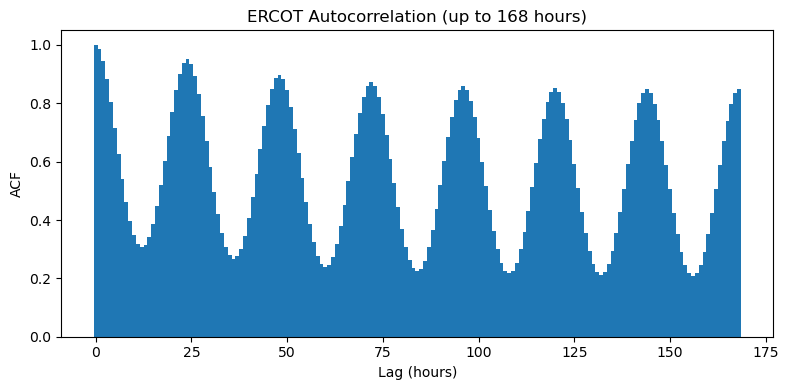

,feature,mutual_information
0,feel,0.523650
1,tmpc,0.509725
2,Max-T,0.398004
3,Min-T,0.342329
4,relh,0.099554
5,sped,0.038680
6,p01m,0.004215


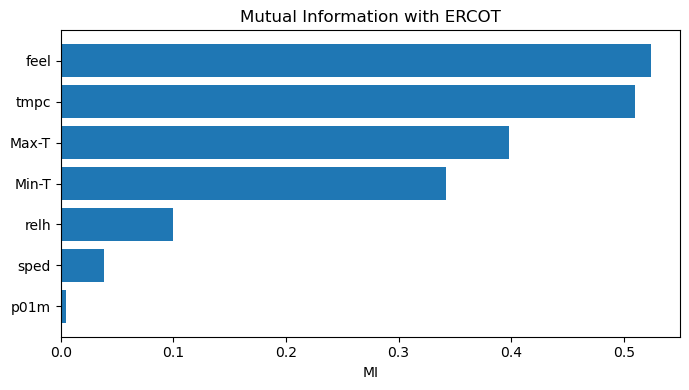

,categorical_feature,effect_size_(η²_or_r)
0,M-label (month),0.374552
1,W-label (weekday),0.006078
2,H-label (holiday),-0.010298


,feature,VIF
0,tmpc,58.471295
3,feel,56.993732
6,Min-T,7.770703
5,Max-T,6.604120
1,relh,1.841964
2,sped,1.415986
4,p01m,1.014730


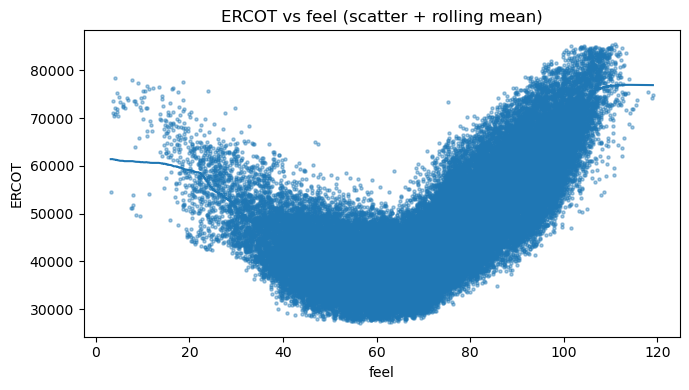

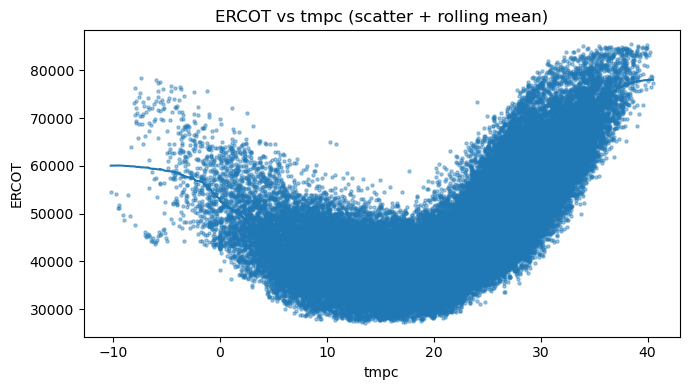

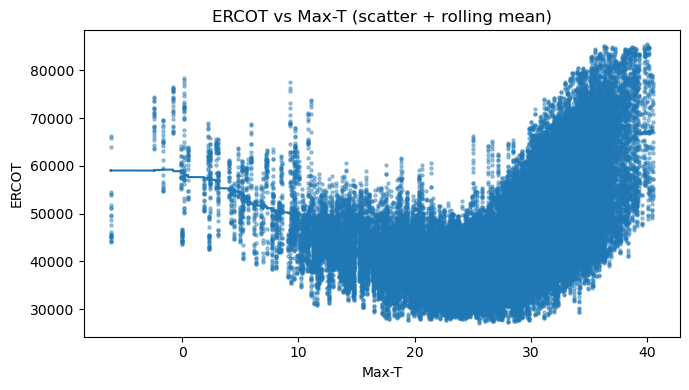


Notes:
- Positive best_lag_hours => weather feature leads ERCOT; consider adding that lag to your model.
- VIF > 10 suggests strong multicollinearity; consider dropping/combining highly collinear features.


In [35]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, spearmanr, pointbiserialr
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import acf

# ——— setup ———
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp', drop=False)

all_cols = ['ERCOT','tmpc','relh','sped','feel','p01m','Max-T','Min-T','M-label','W-label','H-label']
have = [c for c in all_cols if c in df.columns]
d = df[have].dropna().copy()

y = d['ERCOT'].astype(float)
cont_feats = [c for c in ['tmpc','relh','sped','feel','p01m','Max-T','Min-T'] if c in d.columns]
cat_feats  = [c for c in ['M-label','W-label','H-label'] if c in d.columns]

# ——— 1) Pairwise correlations with ERCOT ———
rows = []
for col in cont_feats:
    s = d[col].astype(float)
    pear = y.corr(s, method='pearson')
    spear = y.corr(s, method='spearman')
    kend, _ = kendalltau(y, s)
    rows.append([col, pear, spear, kend])
corr_tbl = pd.DataFrame(rows, columns=['feature','pearson_r','spearman_rho','kendall_tau'])
corr_tbl['abs_pearson'] = corr_tbl['pearson_r'].abs()
corr_tbl = corr_tbl.sort_values('abs_pearson', ascending=False).reset_index(drop=True)
display(corr_tbl)

# Bar chart of |Pearson| (not a heatmap)
plt.figure(figsize=(7,4))
plt.barh(corr_tbl['feature'][::-1], corr_tbl['abs_pearson'][::-1])
plt.title('Absolute Pearson correlation with ERCOT')
plt.xlabel('|r|'); plt.tight_layout(); plt.show()

# ——— 2) Lagged cross-correlations (−72..+72 hours) ———
lags = np.arange(-72, 73)
best_rows = []
for col in cont_feats:
    s = d[col].astype(float)
    corr_by_lag = pd.Series({L: y.corr(s.shift(L)) for L in lags}).sort_index()
    best_lag = corr_by_lag.abs().idxmax()
    best_rows.append([col, int(best_lag), float(corr_by_lag.loc[best_lag])])

    # plot one figure per feature
    plt.figure(figsize=(7,4))
    plt.plot(corr_by_lag.index, corr_by_lag.values)
    plt.axhline(0, linestyle='--'); plt.axvline(0, linestyle='--')
    plt.title(f'Cross-correlation: {col} vs ERCOT (lag in hours; >0 means {col} leads)')
    plt.xlabel('Lag (hours)'); plt.ylabel('Correlation')
    plt.tight_layout(); plt.show()

lag_best = pd.DataFrame(best_rows, columns=['feature','best_lag_hours','corr_at_best_lag']) \
            .sort_values('corr_at_best_lag', key=np.abs, ascending=False).reset_index(drop=True)
display(lag_best)

# ——— 3) Autocorrelation of ERCOT (to 7 days) ———
acf_vals = acf(y, nlags=24*7, fft=True)
lags_acf = np.arange(len(acf_vals))
acf_tbl = pd.DataFrame({'lag_hours': lags_acf, 'acf': acf_vals})
display(acf_tbl.head(15))

# Bar (robust across Matplotlib versions)
plt.figure(figsize=(8,4))
plt.bar(acf_tbl['lag_hours'], acf_tbl['acf'], width=1.0)
plt.title('ERCOT Autocorrelation (up to 168 hours)')
plt.xlabel('Lag (hours)'); plt.ylabel('ACF'); plt.tight_layout(); plt.show()

# ——— 4) Mutual information (non-linear dependence) ———
Xc = d[cont_feats].astype(float)
mi = mutual_info_regression(Xc.values, y.values, discrete_features=[False]*len(cont_feats), random_state=0)
mi_tbl = pd.DataFrame({'feature': cont_feats, 'mutual_information': mi}) \
         .sort_values('mutual_information', ascending=False).reset_index(drop=True)
display(mi_tbl)

plt.figure(figsize=(7,4))
plt.barh(mi_tbl['feature'][::-1], mi_tbl['mutual_information'][::-1])
plt.title('Mutual Information with ERCOT')
plt.xlabel('MI'); plt.tight_layout(); plt.show()

# ——— 5) Effect sizes for categorical time features ———
def eta_squared(y_series, groups):
    overall_mean = y_series.mean()
    ss_total = ((y_series - overall_mean)**2).sum()
    ss_between = 0.0
    for _, idx in groups.groupby(groups).groups.items():
        yi = y_series.loc[idx]
        ss_between += len(yi) * (yi.mean() - overall_mean)**2
    return (ss_between / ss_total) if ss_total > 0 else np.nan

cat_rows = []
if 'M-label' in d:
    cat_rows.append(['M-label (month)', eta_squared(y, d['M-label'])])  # η² (variance explained)
if 'W-label' in d:
    cat_rows.append(['W-label (weekday)', eta_squared(y, d['W-label'])]) # η²
if 'H-label' in d:
    r_pb, _ = pointbiserialr(d['H-label'].astype(int), y)               # point-biserial r
    cat_rows.append(['H-label (holiday)', r_pb])

eff_tbl = pd.DataFrame(cat_rows, columns=['categorical_feature','effect_size_(η²_or_r)'])
display(eff_tbl)

# ——— 6) Multicollinearity (VIF) ———
X_std = (Xc - Xc.mean()) / Xc.std(ddof=0)
X_std = X_std.replace([np.inf, -np.inf], np.nan).dropna()
Xs = sm.add_constant(X_std)
vif_rows = []
for i, col in enumerate(X_std.columns):
    try:
        vif_rows.append([col, variance_inflation_factor(Xs.values, i+1)])
    except Exception:
        vif_rows.append([col, np.nan])
vif_tbl = pd.DataFrame(vif_rows, columns=['feature','VIF']).sort_values('VIF', ascending=False)
display(vif_tbl)

# ——— 7) Scatter + rolling mean for top-3 absolute Pearson features ———
top3 = corr_tbl.head(3)['feature'].tolist()
for col in top3:
    x = d[col].astype(float).to_numpy()
    yv = y.to_numpy()
    order = np.argsort(x)
    xs, ys = x[order], yv[order]
    w = max(5, len(xs)//100)
    ma = pd.Series(ys).rolling(w, min_periods=1, center=True).mean().to_numpy()

    plt.figure(figsize=(7,4))
    plt.scatter(xs, ys, s=5, alpha=0.4)
    plt.plot(xs, ma)
    plt.title(f'ERCOT vs {col} (scatter + rolling mean)')
    plt.xlabel(col); plt.ylabel('ERCOT'); plt.tight_layout(); plt.show()

print("\nNotes:")
print("- Positive best_lag_hours => weather feature leads ERCOT; consider adding that lag to your model.")
print("- VIF > 10 suggests strong multicollinearity; consider dropping/combining highly collinear features.")


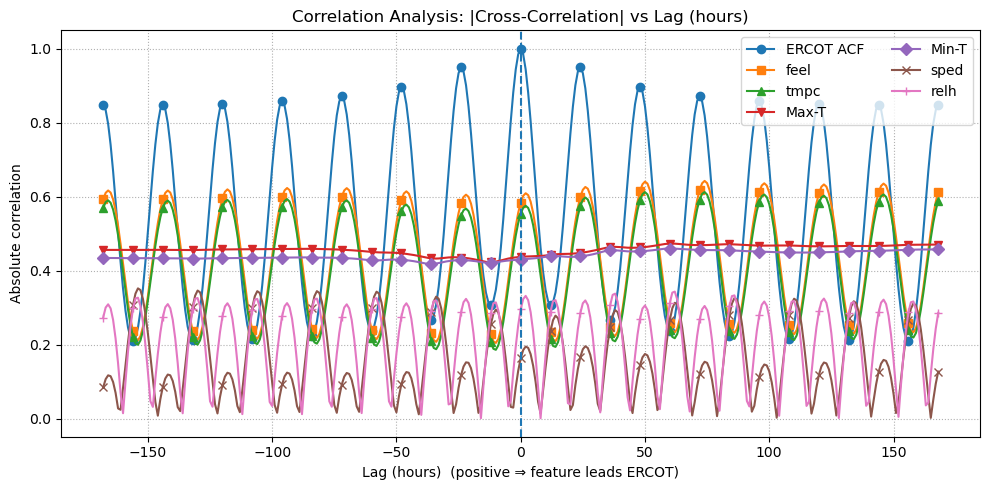

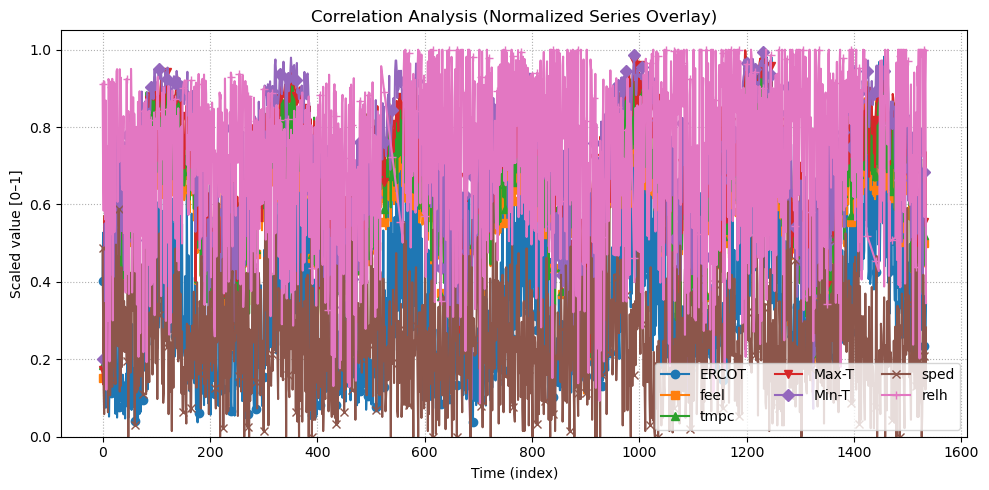

In [39]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Ensure datetime index
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp', drop=False)

target = 'ERCOT'
cont_feats = [c for c in ['tmpc','relh','sped','feel','p01m','Max-T','Min-T'] if c in df.columns]

# Clean
used = [target] + cont_feats
d = df[used].dropna().copy()
y = d[target].astype(float)

# -------- Combined correlation plot (all together) --------
# |Cross-correlation| for each feature across ±7 days (hourly)
lags = np.arange(-168, 169)  # hours
abs_cc = {}
for col in cont_feats:
    x = d[col].astype(float)
    abs_cc[col] = np.abs(np.array([y.corr(x.shift(L)) for L in lags], dtype=float))

# Rank features by peak |corr| across lags, take top-k to avoid clutter
peak = {k: float(np.nanmax(v)) for k, v in abs_cc.items()}
topk = [k for k,_ in sorted(peak.items(), key=lambda kv: kv[1], reverse=True)[:6]]

# Add ERCOT ACF (mirrored to negative lags) to the same plot
acf_vals = acf(y, nlags=168, fft=True)
acf_full = np.concatenate([acf_vals[:0:-1], acf_vals])  # mirror for negative lags
abs_cc['ERCOT ACF'] = np.abs(acf_full)
series_order = ['ERCOT ACF'] + topk

plt.figure(figsize=(10,5))
markers = ['o','s','^','v','D','x','+','*','P']
for i, name in enumerate(series_order):
    m = markers[i % len(markers)]
    vals = abs_cc[name]
    plt.plot(lags, vals, marker=m, markevery=12, linewidth=1.5, label=name)

plt.axvline(0, linestyle='--')
plt.title('Correlation Analysis: |Cross-Correlation| vs Lag (hours)')
plt.xlabel('Lag (hours)  (positive ⇒ feature leads ERCOT)')
plt.ylabel('Absolute correlation')
plt.legend(ncol=2)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('Plots/Correlation Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# -------- OPTIONAL: overlay normalized time series (looks like your image) --------
# Pick the same top features and plot them normalized to [0,1] alongside ERCOT.
to_plot = [target] + topk
Z = d[to_plot].copy()
Z = (Z - Z.min()) / (Z.max() - Z.min())  # min–max scale to [0,1]
# Downsample for speed/clarity if you have many rows (keep ~1500 points)
if len(Z) > 1500:
    Z = Z.iloc[::max(1, len(Z)//1500)].copy()

plt.figure(figsize=(10,5))
mk2 = ['o','s','^','v','D','x','+']
for i, col in enumerate(Z.columns):
    plt.plot(np.arange(len(Z)), Z[col].values, marker=mk2[i % len(mk2)], markevery=max(10, len(Z)//100), label=col)

plt.ylim(0, 1.05)
plt.title('Correlation Analysis (Normalized Series Overlay)')
plt.xlabel('Time (index)')
plt.ylabel('Scaled value [0–1]')
plt.legend(ncol=3)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('Data/Final_dataset_ERCOT_v2.2.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar

# Sample data generation (replace this with your actual DataFrame)
date_range = pd.date_range(start='2023-01-01', end='2023-02-22', freq='H')
df = pd.DataFrame(index=date_range)
np.random.seed(42)
df['tmpc'] = 10 + 10 * np.sin(np.linspace(0, 10, len(df))) + np.random.randn(len(df)) * 2

# === Feature Engineering ===
# Daily Max-T and Min-T
df['Max-T'] = df['tmpc'].resample('D').transform('max')
df['Min-T'] = df['tmpc'].resample('D').transform('min')

# Month and Weekday Labels
df['M-label'] = df.index.month
df['W-label'] = df.index.weekday + 1  # Monday=1, Sunday=7

# Holiday Label (US Federal Holidays)
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df.index.min(), end=df.index.max())
df['H-label'] = df.index.normalize().isin(holidays).astype(int)

# === Plotting ===
plt.figure(figsize=(12, 4))

# Plot raw hourly temperature
plt.plot(df.index, df['tmpc'], label='tmpc (Hourly Temperature)', alpha=0.6)

# Plot Max-T and Min-T as dashed lines
plt.plot(df.index, df['Max-T'], label='Max-T (Daily Max)', color='red', linestyle='--')
plt.plot(df.index, df['Min-T'], label='Min-T (Daily Min)', color='blue', linestyle='--')

# Highlight holiday points
holiday_points = df[df['H-label'] == 1]
plt.scatter(holiday_points.index, holiday_points['tmpc'], color='purple',
            label='Holiday (H-label = 1)', marker='o', zorder=5)

# Chart formatting
plt.title('Zoomed View: 2023-01-01 to 2023-02-22')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.savefig('Plots/Temperature with Daily Max_Min and Holiday Highlights_zoom.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar

# --- Sample Data Generation ---
date_range = pd.date_range(start='2018-01-01', end='2024-12-31', freq='H')
df = pd.DataFrame(index=date_range)
np.random.seed(42)
df['tmpc'] = 10 + 10 * np.sin(np.linspace(0, 10, len(df))) + np.random.randn(len(df)) * 2

# --- Feature Engineering ---
df['Max-T'] = df['tmpc'].resample('D').transform('max')
df['Min-T'] = df['tmpc'].resample('D').transform('min')
df['M-label'] = df.index.month
df['W-label'] = df.index.weekday + 1

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df.index.min(), end=df.index.max())
df['H-label'] = df.index.normalize().isin(holidays).astype(int)

# --- Plotting ---
fig, axes = plt.subplots(2, 1, figsize=(13, 8), sharex=False)

# === Full Data Plot ===
axes[0].plot(df.index, df['tmpc'], label='tmpc (Hourly Temperature)', alpha=0.6)
axes[0].plot(df.index, df['Max-T'], label='Max-T (Daily Max)', color='red', linestyle='--')
axes[0].plot(df.index, df['Min-T'], label='Min-T (Daily Min)', color='blue', linestyle='--')
holiday_points = df[df['H-label'] == 1]
axes[0].scatter(holiday_points.index, holiday_points['tmpc'], color='purple',
                label='Holiday (H-label = 1)', marker='o', zorder=5)

axes[0].set_title('Temperature with Daily Max/Min and Holiday Highlights')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(True)

# === Zoomed-in Plot ===
# Define zoom window (e.g., one week in 2022)
zoom_start = '2023-01-01'
zoom_end = '2023-02-22'
df_zoom = df[zoom_start:zoom_end]

axes[1].plot(df_zoom.index, df_zoom['tmpc'], label='tmpc (Hourly Temperature)', alpha=0.6)
axes[1].plot(df_zoom.index, df_zoom['Max-T'], label='Max-T (Daily Max)', color='red', linestyle='--')
axes[1].plot(df_zoom.index, df_zoom['Min-T'], label='Min-T (Daily Min)', color='blue', linestyle='--')
holiday_points_zoom = df_zoom[df_zoom['H-label'] == 1]
axes[1].scatter(holiday_points_zoom.index, holiday_points_zoom['tmpc'], color='purple',
                label='Holiday (H-label = 1)', marker='o', zorder=5)

axes[1].set_title(f'Zoomed View: {zoom_start} to {zoom_end}')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Temperature (°C)')
axes[1].legend()
axes[1].grid(True)
plt.savefig('Plots/Temperature with Daily Max_Min and Holiday Highlights_zoom.png', dpi=300, bbox_inches='tight')
# --- Final Layout ---
plt.tight_layout()
plt.show()
